In [2]:
import pandas as pd
import numpy as np

dates = pd.date_range(start="2020-01-01", periods=150)
prices = np.concatenate(
    [
        np.linspace(start=110, stop=100, num=50),  # Descend
        np.linspace(start=100, stop=130, num=100),  # Remonte
    ]
)
df = pd.DataFrame(data={"date": dates, "Close": prices})
df["Close Time"] = df["date"]

df.set_index("date", inplace=True)

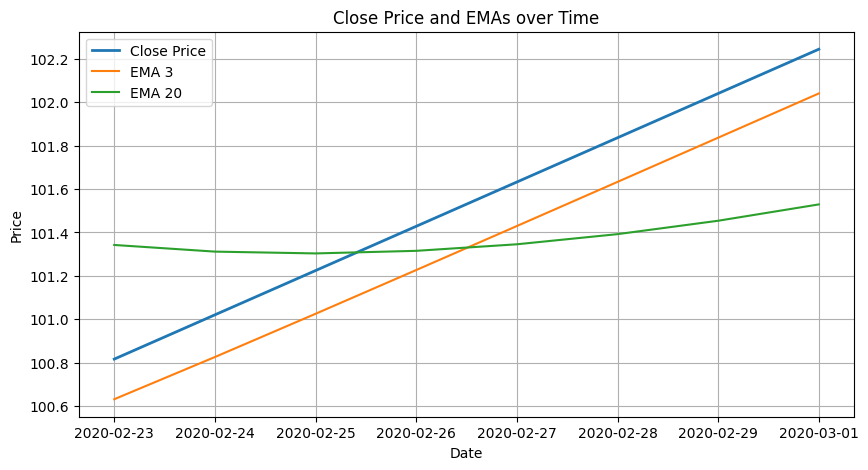

In [7]:
import polars as pl 
from datetime import date

import numpy as np
import matplotlib.pyplot as plt
from src.mtal.analysis import compute_ema

dates = pl.date_range(
        start=date(2020, 1, 1), end=date(2020, 7, 18), interval="1d", eager=True
    )
prices = np.concatenate(
    [
        np.linspace(start=110, stop=100, num=50),  # Descend
        np.linspace(start=100, stop=110, num=50),  # Remonte
        np.linspace(start=110, stop=100, num=50),  # Descend
    ]
)

dates = dates[: len(prices)]
df = pl.DataFrame({"date": dates, "Open": prices})

df = df.with_columns(
    pl.col("Open").shift(-1).alias("Close"),
    pl.col("date").alias("Open Time"),
    pl.col("date").shift(-1).alias("Close Time"),
    (pl.col("Open") * 10).alias("Volume"),
)

df = df.filter(pl.col("date") != df.select(pl.max("date")).to_series()[0])


df = compute_ema(df, span=3)
df = compute_ema(df, span=20)

df_plot = df[53:61]

# Créer le graphique
plt.figure(figsize=(10, 5))  # Définir la taille du graphique
plt.plot(df_plot["date"], df_plot['Close'], label='Close Price', linewidth=2)  
plt.plot(df_plot["date"], df_plot['ema_3'], label='EMA 3')  
plt.plot(df_plot["date"], df_plot['ema_20'], label='EMA 20')  

# Ajouter des titres et des labels
plt.title('Close Price and EMAs over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# Montrer le graphique
plt.grid(True)  # Ajouter une grille pour une meilleure lisibilité
plt.show()


In [6]:
display(df_plot)

,Open,Close,Open Time,ema_3,ema_20
date,,,,,
2020-02-23,100.909091,101.212121,2020-02-23,100.934408,101.428200
2020-02-24,101.212121,101.515152,2020-02-24,101.224780,101.436481
2020-02-25,101.515152,101.818182,2020-02-25,101.521481,101.472833
2020-02-26,101.818182,102.121212,2020-02-26,101.821346,101.534584
2020-02-27,102.121212,102.424242,2020-02-27,102.122794,101.619313
2020-02-28,102.424242,102.727273,2020-02-28,102.425034,101.724833
2020-02-29,102.727273,103.030303,2020-02-29,102.727668,101.849164
2020-03-01,103.030303,103.333333,2020-03-01,103.030501,101.990513


In [16]:
from datetime import date
import polars as pl
import numpy as np

dates = pl.date_range(
    start=date(2020, 1, 1), end=date(2020, 7, 18), interval="1d", eager=True
)
prices = np.concatenate(
    [
        np.linspace(start=110, stop=100, num=50),  # Descend
        np.linspace(start=100, stop=110, num=50),  # Remonte
        np.linspace(start=110, stop=100, num=50),  # Descend
        np.linspace(start=100, stop=110, num=50),  # Remonte
    ]
)

# Create a Polars DataFrame
df = pl.DataFrame({"date": dates, "Open": prices})

df = df.with_columns(
    pl.col("Open").shift(-1).alias("Close"),
    pl.col("date").alias("Open Time"),
    pl.col("date").shift(-1).alias("Close Time"),
    (pl.col("Open") * 10).alias("Volume"),
)

# Drop the last row to match pandas behavior as the shifted 'Close' creates a None at the last position
df = df.filter(pl.col("date") != df.select(pl.max("date")).to_series()[0])
df

date,Open,Close,Open Time,Close Time,Volume
date,f64,f64,date,date,f64
2020-01-01,110.0,109.795918,2020-01-01,2020-01-02,1100.0
2020-01-02,109.795918,109.591837,2020-01-02,2020-01-03,1097.959184
2020-01-03,109.591837,109.387755,2020-01-03,2020-01-04,1095.918367
2020-01-04,109.387755,109.183673,2020-01-04,2020-01-05,1093.877551
2020-01-05,109.183673,108.979592,2020-01-05,2020-01-06,1091.836735
…,…,…,…,…,…
2020-07-13,108.979592,109.183673,2020-07-13,2020-07-14,1089.795918
2020-07-14,109.183673,109.387755,2020-07-14,2020-07-15,1091.836735
2020-07-15,109.387755,109.591837,2020-07-15,2020-07-16,1093.877551


109.79591836734694